In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
datasets = [train,test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [8]:
test.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [6]:
# Passenger ID are numbered sequentially and have no real meaning
train = train.drop('PassengerId', axis=1)
test = test.drop('PassengerId', axis=1)
# Cabin has too many null values
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

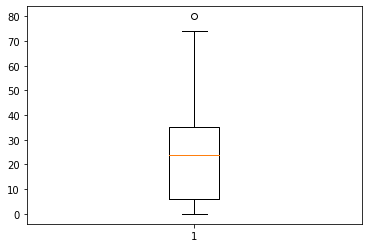

29.69911764705882

In [22]:
# Check the distribution of Age for further process.
plt.boxplot(train['Age'].fillna(0.0))
plt.show()
train['Age'].mean()

In [23]:
# Since almost 80% of all customers are under 40, and the mean value is 29.7, we use the mean value to fill in NAs.
train['Age'].fillna(train.Age.mean(),inplace=True)
test['Age'].fillna(test.Age.mean(),inplace=True)


In [27]:
# Since we have only 2 null values in Embarked, we use the mode to fill in NAs
print(train['Embarked'].value_counts())
train['Embarked'].fillna('S',inplace=True)
# Use the mean value to fill in the only null fare value in test set

test['Fare'].fillna(test.Fare.mean(),inplace=True)

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB
